In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')



In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

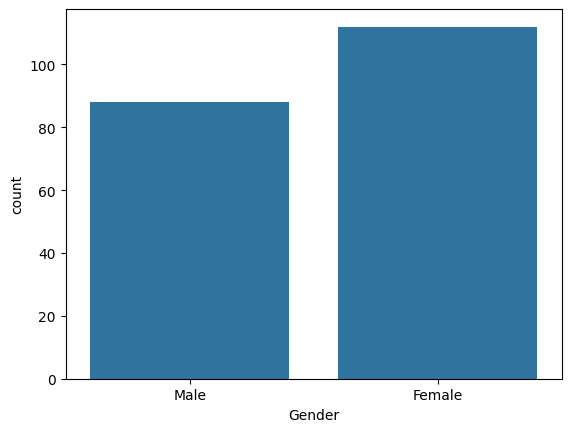

In [6]:
import seaborn as sns
sns.countplot(x='Gender',data=df)

In [7]:
# df.drop(['CustomerID'],axis=1,inplace=True)
# df.drop(['Gender'],axis=1,inplace=True)

In [8]:
x=df.iloc[:,[2,3,4]]

In [9]:
#find Elbow points or k value
#find suitable numbers of clusters
from sklearn.cluster import KMeans
wcss=[] #var1,var2,.....var10
for i in range(1,11):  #i=1,2...10
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(x)
    wcss.append(data.inertia_)
print(wcss)




[308812.78, 221087.19627192977, 158744.9710801394, 104366.15145556197, 97211.84353980477, 68275.94428646986, 51448.36126259324, 44640.02804853041, 42081.855308685306, 38378.73890793208]


Text(0, 0.5, 'Variance')

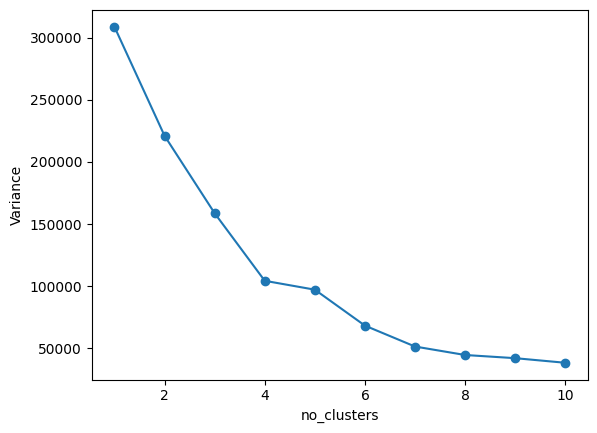

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('no_clusters')
plt.ylabel('Variance')

In [11]:
#n_clusters=7   from graph

In [12]:
data1=KMeans(n_clusters=7,init='k-means++',random_state=42)
data1.fit(x)
y_pred=data1.predict(x)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [13]:
#create new column clusters in x
x['clusters']=y_pred
x

C:\Users\amish\AppData\Local\Temp\ipykernel_23816\98293775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['clusters']=y_pred


,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [14]:
x['clusters'].value_counts()

clusters
0    44
6    38
3    34
4    32
2    23
5    22
1     7
Name: count, dtype: int64

<Axes: xlabel='clusters', ylabel='count'>

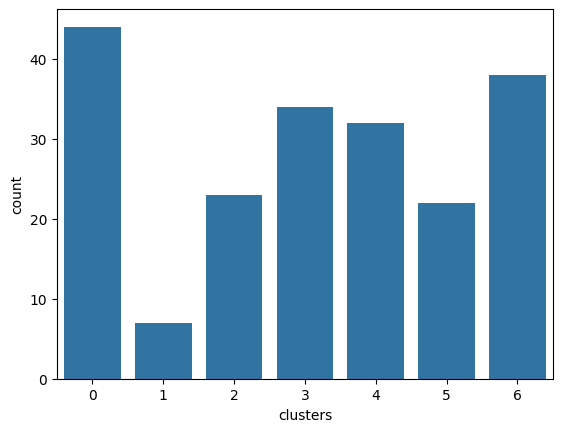

In [15]:
sns.countplot(x='clusters',data=x)

In [16]:
x1=x.iloc[:,:-1].values
y1=x.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
navi=GaussianNB()
svm_model=SVC()
lst=[knn,navi,svm_model]
for j in lst:
    print('model is',j)
    j.fit(x_train,y_train)
    y1_pred=j.predict(x_test)
    print('accuracy_score is')
    print(accuracy_score(y_test,y1_pred))
    classification_report(y_test,y1_pred)
    print('report is')
    print(classification_report(y_test,y1_pred))
    print('*'*100)

model is KNeighborsClassifier(n_neighbors=7)
accuracy_score is
0.9833333333333333
report is
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         5
           6       1.00      0.93      0.96        14

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

****************************************************************************************************
model is GaussianNB()
accuracy_score is
0.9666666666666667
report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.0

In [20]:
print(knn.predict(scalar.transform([[20,19,30]])))

[5]
